In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [2]:
cat_df = pd.read_csv('../data/raw/item_categories.csv')
items_df = pd.read_csv('../data/raw/items.csv')
train_df = pd.read_csv('../data/raw/sales_train.csv')
shops_df = pd.read_csv('../data/raw/shops.csv')
test_df = pd.read_csv('../data/raw/test.csv')
sample_sub_df = pd.read_csv('../data/raw/sample_submission.csv')

### Categories

In [3]:
cat_df.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [7]:
cat_df.isna().mean()

item_category_name    0.0
item_category_id      0.0
dtype: float64

In [8]:
cat_df.duplicated('item_category_name').sum(), cat_df.duplicated('item_category_id').sum()

(0, 0)

### Items

In [16]:
items_df.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [9]:
items_df.isna().mean()

item_name           0.0
item_id             0.0
item_category_id    0.0
dtype: float64

In [10]:
items_df.duplicated('item_name').sum(), items_df.duplicated('item_id').sum()

(0, 0)

In [28]:
len(set(cat_df.item_category_id.tolist()) - set(items_df.item_category_id.tolist()))

0

In [29]:
len(set(items_df.item_category_id.tolist()) - set(cat_df.item_category_id.tolist()))

0

### Shops

In [5]:
shops_df.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [12]:
shops_df.isna().mean()

shop_name    0.0
shop_id      0.0
dtype: float64

In [13]:
shops_df.duplicated('shop_name').sum(), shops_df.duplicated('shop_id').sum()

(0, 0)

### Train

In [3]:
train_df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [14]:
np.random.seed(1)
merged = train_df.merge(test_df, on=['shop_id', 'item_id'])
merged = merged.loc[merged.ID.isin(np.random.choice(merged.ID.unique(), 5))]

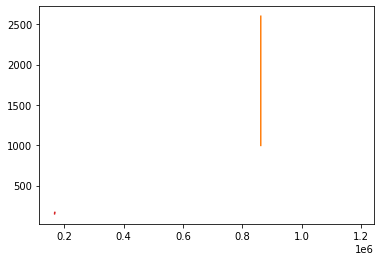

In [15]:
for i, g in merged.groupby('ID'):
    g.item_price.plot()

In [17]:
for i, g in merged.groupby('ID'):
    if g.item_price.nunique() > 1:
        print(i)

95509
150329


In [18]:
merged.loc[merged.ID.isin([95509, 150329])]

date  date_block_num  shop_id  item_id  item_price  \
167938  24.01.2013               0       59    10331       149.0   
167939  16.02.2013               1       59    10331       149.0   
167940  08.08.2013               7       59    10331       149.0   
167941  02.11.2013              10       59    10331       149.0   
167942  31.12.2013              11       59    10331       149.0   
167943  25.06.2014              17       59    10331       149.0   
167944  08.08.2014              19       59    10331       149.0   
167945  14.11.2014              22       59    10331       149.0   
167946  09.03.2015              26       59    10331       169.0   
167947  06.05.2015              28       59    10331       169.0   
862491  11.07.2014              18       14     4965      2599.0   
862492  19.07.2015              30       14     4965       998.0   

        item_cnt_day      ID  
167938           1.0  150329  
167939           1.0  150329  
167940           1.0  150329  
167941           1.0  150329  
167942           1.0  150329  
167943           1.0  150329  
167944           1.0  150329  
167945           1.0  150329  
167946           1.0  150329  
167947           1.0  150329  
862491           1.0   95509  
862492           1.0   95509

In [23]:
for i, g in train_df.groupby(['item_id', 'shop_id']):
    if g.item_price.nunique() > 5:
        print(i)

(30, 6)
(30, 26)
(30, 28)
(30, 31)
(30, 35)
(30, 42)
(31, 5)
(31, 6)
(31, 7)
(31, 12)
(31, 14)
(31, 15)
(31, 18)
(31, 19)
(31, 21)
(31, 22)
(31, 25)
(31, 26)
(31, 27)
(31, 28)
(31, 30)
(31, 31)
(31, 35)
(31, 37)
(31, 41)
(31, 42)
(31, 45)
(31, 46)
(31, 47)
(31, 50)
(31, 54)
(31, 56)
(31, 57)
(31, 59)
(32, 35)
(482, 22)
(492, 55)
(944, 6)
(944, 15)
(944, 18)
(944, 19)
(944, 21)
(944, 22)
(944, 25)
(944, 31)
(944, 37)
(944, 54)
(944, 56)
(944, 57)
(948, 19)
(948, 25)
(948, 28)
(948, 31)
(948, 38)
(948, 42)
(948, 58)
(949, 2)
(949, 4)
(949, 14)
(949, 25)
(949, 27)
(949, 28)
(949, 31)
(949, 35)
(949, 37)
(949, 38)
(949, 47)
(949, 48)
(949, 54)
(949, 57)
(949, 58)
(950, 2)
(950, 19)
(950, 21)
(950, 25)
(950, 27)
(950, 28)
(950, 31)
(950, 38)
(950, 42)
(950, 43)
(950, 48)
(950, 53)
(965, 21)
(965, 25)
(965, 31)
(968, 19)
(968, 31)
(968, 57)
(972, 35)
(1007, 6)
(1007, 15)
(1007, 16)
(1007, 21)
(1007, 22)
(1007, 25)
(1007, 28)
(1007, 31)
(1007, 35)
(1007, 42)
(1007, 54)
(1007, 56)
(1007, 57)
(

(1791, 25)
(1791, 46)
(1795, 31)
(1795, 35)
(1795, 42)
(1800, 7)
(1809, 4)
(1809, 15)
(1809, 18)
(1809, 19)
(1809, 25)
(1809, 27)
(1809, 28)
(1809, 30)
(1809, 31)
(1809, 35)
(1809, 37)
(1809, 38)
(1809, 42)
(1809, 43)
(1809, 46)
(1809, 52)
(1811, 7)
(1811, 18)
(1811, 25)
(1811, 28)
(1811, 29)
(1811, 38)
(1811, 42)
(1811, 57)
(1812, 27)
(1812, 28)
(1812, 57)
(1814, 16)
(1814, 22)
(1814, 25)
(1814, 28)
(1814, 31)
(1814, 42)
(1823, 4)
(1823, 6)
(1823, 7)
(1823, 15)
(1823, 18)
(1823, 19)
(1823, 31)
(1823, 35)
(1823, 42)
(1823, 43)
(1823, 53)
(1823, 54)
(1823, 59)
(1824, 3)
(1824, 4)
(1824, 5)
(1824, 6)
(1824, 7)
(1824, 14)
(1824, 15)
(1824, 16)
(1824, 18)
(1824, 19)
(1824, 22)
(1824, 24)
(1824, 25)
(1824, 27)
(1824, 28)
(1824, 29)
(1824, 30)
(1824, 31)
(1824, 35)
(1824, 38)
(1824, 41)
(1824, 42)
(1824, 43)
(1824, 45)
(1824, 46)
(1824, 47)
(1824, 50)
(1824, 52)
(1824, 53)
(1824, 54)
(1824, 56)
(1824, 58)
(1824, 59)
(1825, 3)
(1825, 6)
(1825, 19)
(1825, 24)
(1825, 27)
(1825, 31)
(1825, 35)
(

(2307, 41)
(2307, 42)
(2307, 53)
(2307, 54)
(2307, 56)
(2308, 6)
(2308, 7)
(2308, 10)
(2308, 14)
(2308, 15)
(2308, 16)
(2308, 18)
(2308, 19)
(2308, 21)
(2308, 22)
(2308, 24)
(2308, 25)
(2308, 26)
(2308, 27)
(2308, 28)
(2308, 29)
(2308, 31)
(2308, 35)
(2308, 37)
(2308, 38)
(2308, 41)
(2308, 42)
(2308, 43)
(2308, 44)
(2308, 45)
(2308, 46)
(2308, 47)
(2308, 50)
(2308, 51)
(2308, 52)
(2308, 53)
(2308, 54)
(2308, 56)
(2308, 57)
(2308, 58)
(2308, 59)
(2309, 2)
(2309, 15)
(2309, 18)
(2309, 24)
(2309, 25)
(2309, 27)
(2309, 28)
(2309, 31)
(2309, 35)
(2309, 38)
(2309, 41)
(2309, 45)
(2309, 46)
(2309, 47)
(2309, 51)
(2309, 53)
(2309, 54)
(2309, 57)
(2309, 58)
(2309, 59)
(2316, 15)
(2316, 19)
(2316, 24)
(2316, 27)
(2316, 31)
(2316, 54)
(2319, 25)
(2319, 27)
(2319, 28)
(2319, 42)
(2321, 3)
(2321, 4)
(2321, 5)
(2321, 6)
(2321, 7)
(2321, 14)
(2321, 15)
(2321, 16)
(2321, 17)
(2321, 18)
(2321, 19)
(2321, 22)
(2321, 24)
(2321, 25)
(2321, 26)
(2321, 27)
(2321, 28)
(2321, 29)
(2321, 30)
(2321, 31)
(2321, 

(2831, 54)
(2833, 5)
(2833, 6)
(2833, 7)
(2833, 14)
(2833, 15)
(2833, 18)
(2833, 19)
(2833, 22)
(2833, 25)
(2833, 26)
(2833, 27)
(2833, 28)
(2833, 30)
(2833, 31)
(2833, 35)
(2833, 38)
(2833, 41)
(2833, 42)
(2833, 43)
(2833, 44)
(2833, 50)
(2833, 53)
(2833, 54)
(2833, 56)
(2833, 57)
(2833, 59)
(2836, 16)
(2836, 25)
(2836, 26)
(2836, 29)
(2836, 31)
(2836, 54)
(2836, 58)
(2844, 6)
(2844, 25)
(2844, 26)
(2844, 27)
(2844, 31)
(2844, 42)
(2844, 46)
(2844, 54)
(2852, 31)
(2854, 28)
(2854, 31)
(2854, 54)
(2854, 59)
(2890, 35)
(2916, 35)
(2918, 7)
(2918, 28)
(2918, 58)
(2919, 7)
(2919, 25)
(2919, 27)
(2919, 35)
(2920, 3)
(2920, 4)
(2920, 7)
(2920, 15)
(2920, 18)
(2920, 27)
(2920, 31)
(2920, 35)
(2920, 41)
(2920, 43)
(2920, 46)
(2920, 50)
(2920, 53)
(2920, 54)
(2921, 7)
(2921, 15)
(2921, 25)
(2921, 28)
(2921, 31)
(2921, 35)
(2921, 38)
(2921, 47)
(2921, 51)
(2921, 54)
(2921, 57)
(2921, 58)
(2934, 19)
(2934, 25)
(2934, 28)
(2934, 29)
(2934, 30)
(2934, 46)
(2934, 47)
(2934, 53)
(2934, 56)
(2939, 7)

(3554, 31)
(3554, 35)
(3554, 37)
(3554, 38)
(3554, 39)
(3554, 41)
(3554, 42)
(3554, 45)
(3554, 46)
(3554, 47)
(3554, 48)
(3554, 49)
(3554, 50)
(3554, 52)
(3554, 53)
(3554, 54)
(3554, 56)
(3554, 57)
(3554, 58)
(3554, 59)
(3556, 2)
(3556, 3)
(3556, 4)
(3556, 5)
(3556, 6)
(3556, 7)
(3556, 9)
(3556, 10)
(3556, 12)
(3556, 14)
(3556, 15)
(3556, 16)
(3556, 17)
(3556, 18)
(3556, 19)
(3556, 21)
(3556, 22)
(3556, 24)
(3556, 25)
(3556, 26)
(3556, 27)
(3556, 28)
(3556, 29)
(3556, 30)
(3556, 31)
(3556, 33)
(3556, 34)
(3556, 35)
(3556, 37)
(3556, 38)
(3556, 39)
(3556, 40)
(3556, 41)
(3556, 42)
(3556, 43)
(3556, 44)
(3556, 45)
(3556, 46)
(3556, 47)
(3556, 48)
(3556, 49)
(3556, 50)
(3556, 51)
(3556, 52)
(3556, 53)
(3556, 54)
(3556, 56)
(3556, 57)
(3556, 58)
(3556, 59)
(3557, 27)
(3565, 6)
(3565, 18)
(3565, 21)
(3565, 24)
(3565, 25)
(3565, 27)
(3565, 28)
(3565, 31)
(3565, 35)
(3565, 38)
(3565, 42)
(3565, 46)
(3565, 47)
(3565, 54)
(3565, 57)
(3565, 58)
(3566, 31)
(3629, 22)
(3629, 31)
(3630, 25)
(3635, 

(4470, 25)
(4470, 31)
(4470, 42)
(4475, 16)
(4475, 25)
(4475, 27)
(4475, 28)
(4475, 31)
(4475, 35)
(4475, 41)
(4475, 42)
(4475, 46)
(4475, 54)
(4475, 58)
(4478, 7)
(4478, 12)
(4478, 25)
(4478, 26)
(4478, 28)
(4478, 31)
(4478, 35)
(4478, 47)
(4478, 51)
(4479, 10)
(4479, 31)
(4479, 35)
(4481, 31)
(4482, 2)
(4482, 3)
(4482, 7)
(4482, 18)
(4482, 19)
(4482, 24)
(4482, 25)
(4482, 28)
(4482, 29)
(4482, 31)
(4482, 35)
(4482, 37)
(4482, 38)
(4482, 42)
(4482, 45)
(4482, 46)
(4482, 47)
(4482, 50)
(4482, 54)
(4482, 57)
(4482, 58)
(4484, 31)
(4493, 10)
(4493, 28)
(4497, 6)
(4497, 7)
(4497, 27)
(4497, 46)
(4497, 56)
(4560, 54)
(4608, 25)
(4633, 35)
(4719, 42)
(4721, 25)
(4723, 2)
(4723, 3)
(4723, 4)
(4723, 5)
(4723, 6)
(4723, 7)
(4723, 14)
(4723, 16)
(4723, 18)
(4723, 19)
(4723, 21)
(4723, 22)
(4723, 24)
(4723, 25)
(4723, 26)
(4723, 27)
(4723, 28)
(4723, 29)
(4723, 30)
(4723, 31)
(4723, 35)
(4723, 37)
(4723, 38)
(4723, 42)
(4723, 43)
(4723, 44)
(4723, 45)
(4723, 46)
(4723, 47)
(4723, 50)
(4723, 52)


(5341, 6)
(5341, 25)
(5341, 28)
(5341, 54)
(5361, 3)
(5361, 4)
(5361, 5)
(5361, 6)
(5361, 7)
(5361, 12)
(5361, 14)
(5361, 15)
(5361, 16)
(5361, 18)
(5361, 19)
(5361, 21)
(5361, 22)
(5361, 24)
(5361, 25)
(5361, 26)
(5361, 27)
(5361, 28)
(5361, 29)
(5361, 30)
(5361, 31)
(5361, 35)
(5361, 37)
(5361, 38)
(5361, 41)
(5361, 42)
(5361, 43)
(5361, 44)
(5361, 45)
(5361, 46)
(5361, 47)
(5361, 48)
(5361, 50)
(5361, 51)
(5361, 52)
(5361, 53)
(5361, 54)
(5361, 56)
(5361, 57)
(5361, 58)
(5361, 59)
(5362, 2)
(5362, 7)
(5362, 25)
(5362, 27)
(5362, 28)
(5362, 31)
(5362, 42)
(5362, 47)
(5362, 54)
(5362, 57)
(5362, 58)
(5363, 28)
(5363, 31)
(5363, 57)
(5364, 15)
(5364, 22)
(5364, 24)
(5364, 25)
(5364, 27)
(5364, 28)
(5364, 29)
(5364, 31)
(5364, 42)
(5364, 54)
(5374, 15)
(5374, 22)
(5374, 24)
(5374, 25)
(5374, 31)
(5374, 57)
(5380, 4)
(5380, 6)
(5380, 7)
(5380, 15)
(5380, 16)
(5380, 18)
(5380, 21)
(5380, 22)
(5380, 24)
(5380, 25)
(5380, 26)
(5380, 27)
(5380, 28)
(5380, 29)
(5380, 30)
(5380, 31)
(5380, 41)

(6418, 18)
(6418, 25)
(6418, 42)
(6422, 25)
(6422, 28)
(6422, 31)
(6422, 42)
(6422, 46)
(6422, 54)
(6422, 57)
(6423, 55)
(6430, 55)
(6432, 21)
(6432, 25)
(6432, 27)
(6432, 28)
(6432, 30)
(6432, 31)
(6432, 35)
(6432, 41)
(6432, 42)
(6432, 43)
(6432, 45)
(6432, 53)
(6432, 54)
(6433, 31)
(6435, 55)
(6436, 25)
(6436, 28)
(6436, 31)
(6436, 35)
(6443, 55)
(6451, 25)
(6455, 18)
(6455, 22)
(6455, 25)
(6455, 31)
(6455, 42)
(6457, 2)
(6457, 3)
(6457, 4)
(6457, 5)
(6457, 6)
(6457, 7)
(6457, 9)
(6457, 10)
(6457, 14)
(6457, 15)
(6457, 16)
(6457, 17)
(6457, 18)
(6457, 19)
(6457, 21)
(6457, 22)
(6457, 24)
(6457, 25)
(6457, 26)
(6457, 27)
(6457, 28)
(6457, 29)
(6457, 30)
(6457, 31)
(6457, 35)
(6457, 37)
(6457, 38)
(6457, 41)
(6457, 42)
(6457, 43)
(6457, 44)
(6457, 45)
(6457, 46)
(6457, 47)
(6457, 48)
(6457, 49)
(6457, 50)
(6457, 52)
(6457, 53)
(6457, 54)
(6457, 56)
(6457, 57)
(6457, 58)
(6457, 59)
(6466, 3)
(6466, 5)
(6466, 7)
(6466, 15)
(6466, 21)
(6466, 25)
(6466, 27)
(6466, 28)
(6466, 31)
(6466, 35

(6953, 31)
(6953, 35)
(6953, 37)
(6953, 38)
(6953, 41)
(6953, 42)
(6953, 43)
(6953, 45)
(6953, 46)
(6953, 47)
(6953, 50)
(6953, 52)
(6953, 53)
(6953, 54)
(6953, 56)
(6953, 59)
(6954, 4)
(6954, 6)
(6954, 15)
(6954, 16)
(6954, 18)
(6954, 19)
(6954, 22)
(6954, 23)
(6954, 25)
(6954, 26)
(6954, 27)
(6954, 28)
(6954, 30)
(6954, 31)
(6954, 35)
(6954, 37)
(6954, 38)
(6954, 41)
(6954, 42)
(6954, 43)
(6954, 45)
(6954, 46)
(6954, 50)
(6954, 52)
(6954, 53)
(6954, 54)
(6954, 56)
(6954, 59)
(6998, 31)
(7003, 4)
(7003, 5)
(7003, 6)
(7003, 7)
(7003, 10)
(7003, 14)
(7003, 15)
(7003, 16)
(7003, 18)
(7003, 19)
(7003, 21)
(7003, 22)
(7003, 24)
(7003, 25)
(7003, 26)
(7003, 27)
(7003, 28)
(7003, 30)
(7003, 31)
(7003, 35)
(7003, 37)
(7003, 38)
(7003, 41)
(7003, 42)
(7003, 43)
(7003, 44)
(7003, 46)
(7003, 47)
(7003, 49)
(7003, 50)
(7003, 51)
(7003, 52)
(7003, 53)
(7003, 54)
(7003, 56)
(7003, 57)
(7003, 58)
(7003, 59)
(7004, 2)
(7004, 3)
(7004, 6)
(7004, 7)
(7004, 12)
(7004, 14)
(7004, 15)
(7004, 16)
(7004, 18

(7966, 55)
(7967, 55)
(7972, 25)
(7972, 42)
(7974, 42)
(7977, 6)
(7977, 41)
(7977, 42)
(7977, 57)
(7978, 27)
(7978, 31)
(7982, 6)
(7982, 21)
(7982, 22)
(7982, 24)
(7982, 25)
(7982, 26)
(7982, 27)
(7982, 28)
(7982, 31)
(7982, 35)
(7982, 37)
(7982, 38)
(7982, 41)
(7982, 42)
(7982, 43)
(7982, 47)
(7982, 54)
(7982, 56)
(7982, 57)
(7982, 58)
(7982, 59)
(7983, 25)
(7983, 26)
(7983, 27)
(7983, 35)
(7983, 37)
(7983, 38)
(7983, 42)
(7983, 57)
(7985, 27)
(7995, 25)
(8042, 43)
(8043, 6)
(8043, 7)
(8043, 16)
(8043, 25)
(8043, 27)
(8043, 28)
(8043, 31)
(8043, 35)
(8043, 38)
(8043, 41)
(8043, 42)
(8043, 47)
(8043, 53)
(8043, 54)
(8043, 56)
(8043, 57)
(8043, 58)
(8043, 59)
(8061, 25)
(8061, 27)
(8061, 31)
(8061, 35)
(8061, 42)
(8077, 31)
(8077, 58)
(8093, 7)
(8093, 15)
(8093, 18)
(8093, 21)
(8093, 22)
(8093, 24)
(8093, 25)
(8093, 26)
(8093, 27)
(8093, 28)
(8093, 29)
(8093, 31)
(8093, 35)
(8093, 37)
(8093, 42)
(8093, 43)
(8093, 47)
(8093, 54)
(8093, 56)
(8093, 57)
(8093, 59)
(8094, 21)
(8094, 25)
(809

(12459, 6)
(12459, 15)
(12459, 16)
(12459, 17)
(12459, 18)
(12459, 19)
(12459, 21)
(12459, 24)
(12459, 25)
(12459, 27)
(12459, 28)
(12459, 30)
(12459, 31)
(12459, 35)
(12459, 37)
(12459, 42)
(12459, 43)
(12459, 46)
(12459, 53)
(12459, 54)
(12569, 25)
(12569, 31)
(12625, 6)
(12625, 31)
(12625, 42)
(12672, 42)
(12677, 31)
(12686, 6)
(12686, 31)
(12686, 51)
(12693, 21)
(12693, 42)
(12718, 25)
(12718, 27)
(12718, 31)
(12737, 31)
(12754, 37)
(12764, 22)
(12764, 25)
(12764, 28)
(12764, 31)
(12771, 25)
(12793, 25)
(12793, 27)
(12793, 31)
(12793, 54)
(12793, 57)
(12803, 25)
(12803, 28)
(12804, 6)
(12804, 21)
(12804, 25)
(12804, 28)
(12804, 31)
(12804, 42)
(12804, 54)
(12804, 56)
(12805, 51)
(12806, 42)
(12807, 51)
(12808, 6)
(12808, 31)
(12808, 42)
(12809, 51)
(12817, 57)
(12829, 31)
(12845, 31)
(12858, 25)
(12858, 31)
(12858, 42)
(12860, 51)
(12876, 31)
(12900, 6)
(12900, 21)
(12900, 24)
(12900, 25)
(12900, 28)
(12900, 31)
(12900, 42)
(12900, 54)
(12901, 31)
(12912, 12)
(12912, 15)
(12912, 25

(15063, 25)
(15063, 28)
(15063, 29)
(15063, 31)
(15063, 35)
(15063, 42)
(15063, 50)
(15063, 57)
(15066, 25)
(15066, 31)
(15066, 37)
(15066, 48)
(15066, 51)
(15089, 25)
(15089, 31)
(15089, 54)
(15104, 31)
(15104, 54)
(15217, 12)
(15217, 46)
(15226, 21)
(15226, 25)
(15226, 49)
(15231, 31)
(15256, 25)
(15256, 35)
(15257, 31)
(15275, 35)
(15284, 12)
(15284, 25)
(15284, 27)
(15284, 31)
(15284, 35)
(15287, 28)
(15287, 35)
(15287, 54)
(15321, 25)
(15321, 27)
(15334, 25)
(15334, 31)
(15336, 22)
(15344, 31)
(15345, 31)
(15346, 7)
(15346, 10)
(15346, 21)
(15346, 22)
(15346, 25)
(15346, 49)
(15346, 51)
(15346, 59)
(15375, 25)
(15395, 35)
(15422, 22)
(15423, 10)
(15423, 51)
(15438, 28)
(15444, 31)
(15446, 2)
(15446, 6)
(15446, 12)
(15446, 19)
(15446, 21)
(15446, 25)
(15446, 26)
(15446, 27)
(15446, 28)
(15446, 31)
(15446, 42)
(15446, 45)
(15446, 46)
(15446, 47)
(15446, 50)
(15446, 54)
(15446, 58)
(15446, 59)
(15450, 28)
(15455, 28)
(15458, 25)
(15458, 31)
(15458, 56)
(15459, 31)
(15472, 35)
(15503,

(18574, 57)
(18577, 57)
(18589, 31)
(18591, 31)
(18592, 25)
(18592, 27)
(18592, 31)
(18622, 31)
(18623, 15)
(18623, 25)
(18623, 31)
(18623, 42)
(18623, 46)
(18623, 54)
(18624, 25)
(18624, 26)
(18624, 27)
(18624, 31)
(18624, 42)
(18624, 57)
(18626, 42)
(18825, 31)
(18827, 31)
(18848, 31)
(18881, 25)
(18884, 31)
(18884, 35)
(18884, 51)
(18884, 57)
(18943, 6)
(18958, 21)
(18958, 25)
(18958, 31)
(18980, 31)
(19004, 51)
(19006, 51)
(19034, 21)
(19034, 25)
(19034, 26)
(19034, 28)
(19034, 42)
(19059, 25)
(19059, 31)
(19067, 35)
(19089, 6)
(19089, 25)
(19089, 26)
(19089, 31)
(19091, 31)
(19091, 42)
(19093, 18)
(19093, 25)
(19093, 31)
(19116, 51)
(19117, 25)
(19117, 31)
(19118, 21)
(19119, 31)
(19132, 25)
(19132, 31)
(19159, 25)
(19159, 27)
(19159, 31)
(19196, 19)
(19196, 35)
(19234, 54)
(19247, 25)
(19254, 27)
(19405, 6)
(19405, 15)
(19405, 19)
(19405, 27)
(19405, 31)
(19405, 42)
(19405, 54)
(19405, 56)
(19406, 6)
(19406, 18)
(19406, 19)
(19406, 24)
(19406, 25)
(19406, 27)
(19406, 28)
(19406, 

In [27]:
len(set(shops_df.shop_id.tolist()) - set(train_df.shop_id.tolist()))

0

In [26]:
len(set(train_df.shop_id.tolist()) - set(shops_df.shop_id.tolist()))

0

In [25]:
len(set(train_df.item_id.tolist()) - set(items_df.item_id.tolist()))

0

In [24]:
len(set(items_df.item_id.tolist()) - set(train_df.item_id.tolist()))

363

Not all items are present in train data

### Test

In [32]:
test_df.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [51]:
len(set(shops_df.shop_id.tolist()) - set(test_df.shop_id.tolist()))

18

In [35]:
len(set(test_df.shop_id.tolist()) - set(shops_df.shop_id.tolist()))

0

In [36]:
len(set(test_df.item_id.tolist()) - set(items_df.item_id.tolist()))

0

In [37]:
len(set(items_df.item_id.tolist()) - set(test_df.item_id.tolist()))

17070

In [38]:
len(set(test_df.shop_id.tolist()) - set(train_df.shop_id.tolist()))

0

In [39]:
len(set(train_df.shop_id.tolist()) - set(test_df.shop_id.tolist()))

18

In [40]:
len(set(train_df.item_id.tolist()) - set(test_df.item_id.tolist()))

17070

In [41]:
len(set(test_df.item_id.tolist()) - set(train_df.item_id.tolist()))

363

Not all items from test are present in train

### Sample  Submission

In [45]:
sample_sub_df.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [46]:
len(set(test_df.ID.tolist()) - set(sample_sub_df.ID.tolist()))

0

## Data Manipulation

In [52]:
train_with_cat_df = train_df.merge(items_df[['item_id', 'item_category_id']], on='item_id', how='left')

In [54]:
train_with_cat_df.item_category_id.isna().sum()

0

In [79]:
dates = pd.to_datetime(train_with_cat_df.date.unique(), format='%d.%m.%Y').to_frame(name='date')

In [80]:
dates_real = pd.Series(pd.date_range(start=dates.date.min(), end=dates.date.max())).to_frame(name='date')

In [81]:
dates_real.merge(dates, on='date', how='left', indicator=True)._merge.value_counts()

both          1034
left_only        0
right_only       0
Name: _merge, dtype: int64

All dates are present in dataset at least once

In [82]:
%%time
datasets = {name: group for name, group in train_with_cat_df.groupby(['shop_id', 'item_id'])}

In [86]:
train_with_cat_df.shop_id.nunique() * train_with_cat_df.item_id.nunique()

1308420

In [89]:
if not os.path.exists('../data/interim/datasets_raw'):
    os.mkdir('../data/interim/datasets_raw')

In [91]:
%%time
for k,v in datasets.items():
    v.to_csv(f'../data/interim/datasets_raw/shop_{k[0]}_item_{k[1]}.csv', index=False)

In [93]:
filenames = [filename for filename in os.listdir('../data/interim/datasets_raw') if filename.endswith('.csv')]

In [97]:
assert len(filenames) == len(datasets)

## Analyze one shop-item pair

In [136]:
np.random.seed(2022)
filename = np.random.choice(filenames)
df = pd.read_csv(os.path.join('../data/interim/datasets_raw', filename))

In [137]:
filename

'shop_14_item_7207.csv'

In [140]:
df

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   08.11.2013              10       14     7207       199.0           1.0   
1   23.11.2013              10       14     7207       199.0           1.0   
2   26.12.2013              11       14     7207       199.0           1.0   
3   26.01.2014              12       14     7207       199.0           1.0   
4   02.01.2014              12       14     7207       199.0           2.0   
5   01.03.2014              14       14     7207       199.0           1.0   
6   28.05.2014              16       14     7207       199.0           1.0   
7   06.05.2014              16       14     7207       199.0           1.0   
8   26.05.2014              16       14     7207       199.0           1.0   
9   12.06.2014              17       14     7207       199.0           1.0   
10  20.06.2014              17       14     7207       199.0           1.0   
11  10.07.2014              18       14     7207       199.0           1.0   
12  05.08.2014              19       14     7207       199.0           1.0   
13  16.11.2014              22       14     7207       199.0           1.0   

    item_category_id  
0                 30  
1                 30  
2                 30  
3                 30  
4                 30  
5                 30  
6                 30  
7                 30  
8                 30  
9                 30  
10                30  
11                30  
12                30  
13                30